# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latlngCity = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    latlngCity.append(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.

  
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_count = len(cities)
base_url = "http://api.openweathermap.org/data/2.5/weather?"
i=0
f = open(output_data_file, "w+")
fr = csv.writer(f)
#found_city_count = 0
#not_found_city_c = 0
header = ['City','Cloudiness','Country','Date','Humidity','Lat', 'Lon', 'Max Temp', 'Wind Speed']
fr.writerow(header)
for i in range(city_count) :
    city = cities[i]
    city_data = []

    # Build query URL
    query_url = base_url + "appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    if weather_json['cod'] == '404' :
        print(f'Error!!! Processing City : {city} , not found \n {query_url}')
    else :        
        city_ID = weather_json['id']
        print(f'Processed City : {city} , city ID: {city_ID} \n {query_url} ')

        #writing into csv file
        city_data.append(weather_json['name'])
        city_data.append(weather_json['clouds']['all'])
        city_data.append(weather_json['sys']['country'])
        city_data.append(weather_json['dt'])
        city_data.append(weather_json['main']['humidity'])
        city_data.append(weather_json['coord']['lat'])
        city_data.append(weather_json['coord']['lon'])
        city_data.append(weather_json['main']['temp'])
        city_data.append(weather_json['wind']['speed'])
    
        print(city_data)
        fr.writerow(city_data)
f.close()  



Error!!! Processing City : lamidan , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=lamidan
Processed City : krasnoshchekovo , city ID: 1502066 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=krasnoshchekovo 
['Krasnoshchekovo', 0, 'RU', 1553753811, 88, 51.67, 82.73, 277.019, 4.06]
Processed City : leningradskiy , city ID: 2123814 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=leningradskiy 
['Leningradskiy', 76, 'RU', 1553753250, 86, 69.38, 178.42, 265.219, 9.86]
Processed City : wuxue , city ID: 1790894 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=wuxue 
['Wuxue', 92, 'CN', 1553753812, 97, 29.85, 115.56, 289.169, 2.36]
Error!!! Processing City : illoqqortoormiut , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=illoqqortoormiut
Processed City : yatou , 

Processed City : port alfred , city ID: 964432 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=port alfred 
['Port Alfred', 20, 'ZA', 1553753809, 76, -33.59, 26.89, 294.069, 5.26]
Processed City : vila franca do campo , city ID: 3372472 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=vila franca do campo 
['Vila Franca do Campo', 20, 'PT', 1553753246, 76, 37.72, -25.43, 286.04, 4.6]
Processed City : ubatuba , city ID: 3445847 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=ubatuba 
['Ubatuba', 88, 'BR', 1553753821, 100, -23.43, -45.08, 292.219, 2.21]
Processed City : atuona , city ID: 4020109 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=atuona 
['Atuona', 0, 'PF', 1553753102, 100, -9.8, -139.03, 301.319, 6.26]
Processed City : provideniya , city ID: 4031574 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c17

Processed City : matara , city ID: 3948642 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=matara 
['Matara', 92, 'PE', 1553753832, 100, -13.74, -72.9, 279.019, 0.86]
Processed City : east london , city ID: 1006984 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=east london 
['East London', 0, 'ZA', 1553749200, 72, -33.02, 27.91, 292.15, 3.6]
Processed City : hilo , city ID: 5855927 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=hilo 
['Hilo', 40, 'US', 1553753056, 78, 19.71, -155.08, 293.1, 2.6]
Processed City : lavrentiya , city ID: 4031637 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=lavrentiya 
['Lavrentiya', 80, 'RU', 1553753281, 92, 65.58, -170.99, 273.169, 9.96]
Processed City : rwamagana , city ID: 201463 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=rwamagana 
['Rw

Processed City : saint george , city ID: 262462 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=saint george 
['Saint George', 90, 'GR', 1553753003, 76, 39.45, 22.34, 283.5, 5.1]
Processed City : aykhal , city ID: 2027296 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=aykhal 
['Aykhal', 0, 'RU', 1553753841, 81, 65.95, 111.51, 271.669, 2.21]
Processed City : chumikan , city ID: 2025256 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=chumikan 
['Chumikan', 76, 'RU', 1553753842, 69, 54.72, 135.31, 268.069, 2.01]
Processed City : puerto ayora , city ID: 3652764 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=puerto ayora 
['Puerto Ayora', 0, 'EC', 1553747470, 91, -0.74, -90.35, 297.59, 3.36]
Processed City : kavieng , city ID: 2094342 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=

Processed City : estelle , city ID: 4671240 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=estelle 
['Estelle', 40, 'US', 1553753619, 52, 32.87, -97.01, 290.51, 6.2]
Processed City : cidreira , city ID: 3466165 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=cidreira 
['Cidreira', 64, 'BR', 1553753297, 75, -30.17, -50.22, 293.819, 5.26]
Processed City : dawlatabad , city ID: 1142226 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=dawlatabad 
['Dawlatabad', 68, 'AF', 1553753853, 66, 36.41, 64.91, 295.019, 3.41]
Processed City : norman wells , city ID: 6089245 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=norman wells 
['Norman Wells', 75, 'CA', 1553749200, 86, 65.28, -126.83, 276.15, 5.7]
Processed City : vao , city ID: 588365 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=vao

Processed City : anadyr , city ID: 2127202 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=anadyr 
['Anadyr', 90, 'RU', 1553752949, 85, 64.73, 177.51, 266.03, 7]
Error!!! Processing City : tsihombe , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=tsihombe
Processed City : progreso , city ID: 3440963 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=progreso 
['Progreso', 0, 'UY', 1553753782, 82, -34.68, -56.22, 288.32, 3.1]
Processed City : pijino , city ID: 3672249 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=pijino 
['Pijino', 44, 'CO', 1553753865, 78, 9.33, -74.45, 299.219, 2.11]
Processed City : port elizabeth , city ID: 4501427 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=port elizabeth 
['Port Elizabeth', 1, 'US', 1553753609, 92, 39.31, -74.98, 272.4, 1.46]
P

Error!!! Processing City : olafsvik , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=olafsvik
Processed City : yerbogachen , city ID: 2012956 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=yerbogachen 
['Yerbogachen', 56, 'RU', 1553753363, 70, 61.28, 108.01, 273.469, 1.71]
Processed City : chino valley , city ID: 5289658 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=chino valley 
['Chino Valley', 1, 'US', 1553753844, 43, 34.76, -112.45, 282.01, 3.1]
Processed City : caravelas , city ID: 3466980 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=caravelas 
['Caravelas', 64, 'BR', 1553753878, 100, -17.73, -39.27, 300.319, 8.61]
Processed City : mackay , city ID: 5921525 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=mackay 
['Mackay', 90, 'CA', 1553749200, 86, 53.65, -1

Processed City : klyuchi , city ID: 1503153 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=klyuchi 
['Klyuchi', 0, 'RU', 1553753889, 63, 52.25, 79.17, 276.919, 5.21]
Processed City : vestmannaeyjar , city ID: 3412093 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=vestmannaeyjar 
['Vestmannaeyjar', 90, 'IS', 1553749920, 100, 63.44, -20.27, 272.15, 10.3]
Processed City : zaysan , city ID: 1517060 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=zaysan 
['Zaysan', 12, 'KZ', 1553753889, 67, 47.47, 84.87, 282.619, 1.71]
Processed City : mana , city ID: 789988 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=mana 
['Mana', 0, 'RS', 1553752800, 68, 43.52, 20.24, 272.67, 0.5]
Processed City : misratah , city ID: 2214846 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=misratah 
['Misratah

Processed City : baijiantan , city ID: 1529626 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=baijiantan 
['Baijiantan', 24, 'CN', 1553753900, 81, 45.63, 85.18, 286.069, 3.31]
Processed City : ust-karsk , city ID: 2013942 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=ust-karsk 
['Ust-Karsk', 56, 'RU', 1553753355, 27, 52.71, 118.82, 271.569, 1.66]
Error!!! Processing City : sahrak , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=sahrak
Processed City : eenhana , city ID: 3357804 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=eenhana 
['Eenhana', 75, 'NA', 1553749200, 77, -17.48, 16.34, 294.15, 1]
Processed City : onega , city ID: 515246 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=onega 
['Onega', 8, 'RU', 1553753901, 89, 63.91, 38.09, 269.569, 3.61]
Processed Ci

Processed City : roanoke rapids , city ID: 4488232 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=roanoke rapids 
['Roanoke Rapids', 1, 'US', 1553753890, 69, 36.46, -77.65, 273.39, 2.86]
Processed City : klaksvik , city ID: 2618795 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=klaksvik 
['Klaksvik', 76, 'FO', 1553752200, 87, 62.23, -6.59, 281.15, 6.2]
Processed City : vostok , city ID: 2013279 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=vostok 
['Vostok', 68, 'RU', 1553753400, 48, 46.45, 135.83, 267.669, 2.21]
Processed City : changde , city ID: 1791121 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=changde 
['Changde', 92, 'CN', 1553753913, 93, 29.04, 111.68, 291.919, 2.56]
Processed City : ixtapa , city ID: 4004293 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=ixtapa 

Processed City : bilma , city ID: 2446796 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=bilma 
['Bilma', 44, 'NE', 1553753924, 31, 18.69, 12.92, 290.569, 1.76]
Processed City : namtsy , city ID: 2019488 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=namtsy 
['Namtsy', 0, 'RU', 1553751000, 47, 62.72, 129.66, 264.15, 2]
Processed City : terney , city ID: 2015352 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=terney 
['Terney', 0, 'RU', 1553753925, 84, 45.05, 136.61, 272.619, 6.81]
Processed City : gravdal , city ID: 3147822 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=gravdal 
['Gravdal', 75, 'NO', 1553753886, 100, 59.79, 5.78, 280.36, 5.1]
Processed City : barranco , city ID: 3466723 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=barranco 
['Barranco', 92, 'BR', 1553753926

Processed City : tiznit , city ID: 2527089 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=tiznit 
['Tiznit', 76, 'MA', 1553753818, 96, 29.7, -9.73, 285.469, 1.31]
Processed City : kita , city ID: 1850144 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=kita 
['Kita', 75, 'JP', 1553753924, 71, 35.76, 139.74, 288, 5.7]
Processed City : mabaruma , city ID: 3377301 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=mabaruma 
['Mabaruma', 92, 'GY', 1553753937, 90, 8.2, -59.78, 298.419, 2.76]
Processed City : presque isle , city ID: 4975966 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=presque isle 
['Presque Isle', 1, 'US', 1553753614, 42, 46.68, -68.02, 269.98, 3.1]
Error!!! Processing City : sentyabrskiy , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=sentyabrskiy
Process

Processed City : borogontsy , city ID: 2026160 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=borogontsy 
['Borogontsy', 0, 'RU', 1553753950, 49, 62.67, 131.17, 267.119, 1.71]
Processed City : eydhafushi , city ID: 1337606 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=eydhafushi 
['Eydhafushi', 0, 'MV', 1553753950, 100, 5.1, 73.07, 302.119, 3.21]
Error!!! Processing City : gurgan , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=gurgan
Processed City : suleja , city ID: 2322794 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=suleja 
['Suleja', 0, 'NG', 1553749200, 50, 9.18, 7.18, 298.15, 1]
Processed City : araouane , city ID: 2460954 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=araouane 
['Araouane', 68, 'ML', 1553753951, 67, 18.9, -3.53, 296.569, 1.76]
Processed

Error!!! Processing City : envira , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=envira
Processed City : dunedin , city ID: 2191562 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=dunedin 
['Dunedin', 0, 'NZ', 1553753636, 75, -45.87, 170.5, 287.04, 4.02]
Processed City : sumenep , city ID: 1626099 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=sumenep 
['Sumenep', 0, 'ID', 1553753964, 100, -7.02, 113.87, 301.569, 1.11]
Processed City : pemberton , city ID: 2063604 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=pemberton 
['Pemberton', 0, 'AU', 1553753886, 59, -34.44, 116.03, 294, 2.68]
Processed City : garowe , city ID: 58933 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=garowe 
['Garowe', 0, 'SO', 1553753965, 75, 8.41, 48.48, 296.619, 1.81]
Processed City : phan

Processed City : ixtlahuacan del rio , city ID: 4004274 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=ixtlahuacan del rio 
['Ixtlahuacan del Rio', 75, 'MX', 1553751960, 37, 20.87, -103.25, 293.15, 1.06]
Processed City : marshall , city ID: 4243951 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=marshall 
['Marshall', 90, 'US', 1553753944, 57, 39.39, -87.69, 281.57, 3.1]
Processed City : zharkent , city ID: 1520253 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=zharkent 
['Zharkent', 64, 'KZ', 1553753978, 70, 44.17, 80, 280.919, 0.31]
Processed City : yoichi , city ID: 2129218 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=yoichi 
['Yoichi', 40, 'JP', 1553752811, 43, 43.19, 140.77, 274.93, 10.8]
Error!!! Processing City : louisbourg , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3

Error!!! Processing City : monatele , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=monatele
Error!!! Processing City : lolua , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=lolua
Processed City : padilla , city ID: 3673407 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=padilla 
['Padilla', 75, 'CO', 1553752800, 78, 3.23, -76.31, 296.15, 2.1]
Processed City : isangel , city ID: 2136825 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=isangel 
['Isangel', 40, 'VU', 1553749200, 66, -19.55, 169.27, 303.15, 6.2]
Processed City : iranduba , city ID: 3736808 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=iranduba 
['Iranduba', 0, 'BR', 1553749200, 78, -3.28, -60.19, 300.15, 2.1]
Error!!! Processing City : tabiauea , not found 
 http://api.openweathermap.org/dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame(pd.read_csv(output_data_file))
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Krasnoshchekovo,0,RU,1553753811,88,51.67,82.73,277.019,4.06
1,Leningradskiy,76,RU,1553753250,86,69.38,178.42,265.219,9.86
2,Wuxue,92,CN,1553753812,97,29.85,115.56,289.169,2.36
3,Yatou,40,CM,1553749200,100,3.63,9.81,299.150,4.36
4,Vaini,0,IN,1553753812,38,15.34,74.49,308.219,0.96
5,Chokurdakh,24,RU,1553753813,84,70.62,147.90,258.269,5.76
6,Bluff,100,AU,1553753813,98,-23.58,149.07,295.119,5.41
7,Bonavista,0,CA,1553753805,72,48.65,-53.11,264.260,1.34
8,Dingle,20,PH,1553753814,78,11.00,122.67,301.919,4.86
9,Cape Town,20,ZA,1553753181,100,-33.93,18.42,288.800,1.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

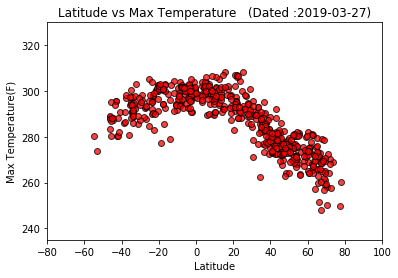

In [6]:
x_axis = df['Lat']
timestamp = df['Date'].max()
date = str(date.fromtimestamp(timestamp))
plt.scatter(x_axis, df['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Max Temperature " + "  (Dated :" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.xlim(-80,100)
plt.ylim(235,330)
plt.savefig("./MaxTemperaturePlot.png")
plt.show()

#### Latitude vs. Humidity Plot

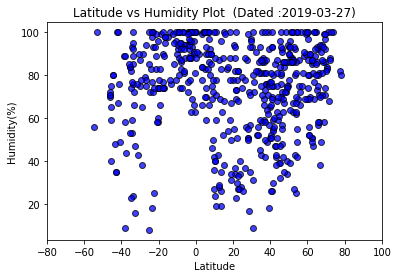

In [8]:
plt.scatter(x_axis, df['Humidity'], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Humidity Plot " + " (Dated :" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(-80,100)
plt.savefig("./HumidityPlot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

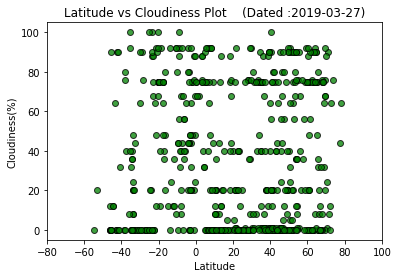

In [11]:
plt.scatter(x_axis, df['Cloudiness'], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Cloudiness Plot  " + "  (Dated :" + date+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlim(-80,100)
plt.savefig("./CloudinessPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

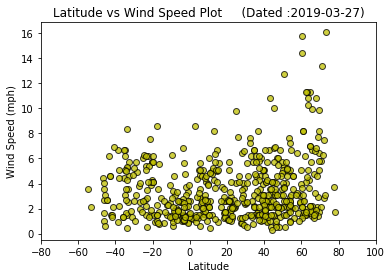

In [12]:
plt.scatter(x_axis, df['Wind Speed'], marker="o", facecolors="y", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Wind Speed Plot  " + "   (Dated :" + date +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.savefig("./WindSpeedPlot.png")
plt.show()